In [31]:
!pip install apify-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 116.7 MB/s eta 0:00:00


In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.6 MB/s eta 0:00:00


In [54]:
!pip install wordcloud matplotlib

In [59]:
!pip install tqdm

In [130]:
import re
import ast
import string
import time
import json
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from wordcloud import WordCloud
from apify_client import ApifyClient
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline

In [ ]:
APIFY_TOKEN = 'apify_api_n24padGm0mgdADZprIW673Ylfh28XW2vtBRD'
client = ApifyClient(APIFY_TOKEN)

In [ ]:
start_urls = [
    {"url": "https://maps.app.goo.gl/txvxdJ8yosxNuDqL6"},
    {"url": "https://maps.app.goo.gl/BCpkoA1yo51PSAoo7"},
    {"url": "https://maps.app.goo.gl/sbRgSJp7czaDvCST9"},
    {"url": "https://maps.app.goo.gl/6mBsgMiihF1ZUYjx7"},
    {"url": "https://maps.app.goo.gl/mf8iuUuKTJR9pFcYA"},
    {"url": "https://maps.app.goo.gl/hk9oXyjHmwFcKe3p8"},
    {"url": "https://maps.app.goo.gl/NX6v7PW4kZoTufzs6"},
    {"url": "https://maps.app.goo.gl/syBCbapVBgVve6Fn7"},
    {"url": "https://maps.app.goo.gl/hqzeM5nJreAmuCCB6"},
    {"url": "https://maps.app.goo.gl/Sa55jXRxiS2WDXBD6"},
    {"url": "https://maps.app.goo.gl/AvGYbHwwedDQYY576"},
    {"url": "https://maps.app.goo.gl/6UisZGZ4FXjoqzww8"},
    {"url": "https://maps.app.goo.gl/FX66gsBsvQ5amDWf9"},
    {"url": "https://maps.app.goo.gl/7iVCk2budSfv2XPC9"},
]

In [ ]:
run_input = {
    "startUrls": start_urls,
    "maxReviews": 500,
    "language": "id",  # Prioritaskan review bahasa Indonesia
    "reviewsSort": "newest", # Atau "relevant"
    "scrapeReviewerId": True,
    "scrapeReviewerName": True,
    "scrapeReviewerUrl": True,
    "reviewsDistribution": True,
    "oneReviewPerRow": True # Format baris per review (penting untuk analisis)
}

In [ ]:
run = client.actor("compass/crawler-google-places").call(run_input=run_input)
dataset_items = client.dataset(run["defaultDatasetId"]).list_items().items

[apify.crawler-google-places runId:yuIxdbOaJ8dT82W1h] -> Status: RUNNING, Message: 
[apify.crawler-google-places runId:yuIxdbOaJ8dT82W1h] -> 2025-12-13T16:10:57.200Z ACTOR: Pulling container image of build jle32gdNzcHnZ8WES from registry.
[apify.crawler-google-places runId:yuIxdbOaJ8dT82W1h] -> 2025-12-13T16:10:57.203Z ACTOR: Creating container.
[apify.crawler-google-places runId:yuIxdbOaJ8dT82W1h] -> 2025-12-13T16:10:57.315Z ACTOR: Starting container.
[apify.crawler-google-places runId:yuIxdbOaJ8dT82W1h] -> 2025-12-13T16:10:57.317Z ACTOR: Running under "LIMITED_PERMISSIONS" permission level.
[apify.crawler-google-places runId:yuIxdbOaJ8dT82W1h] -> 2025-12-13T16:10:59.101Z INFO  System info {"apifyVersion":"3.5.1","apifyClientVersion":"2.19.0","crawleeVersion":"3.14.1","osType":"Linux","nodeVersion":"v18.20.8"}
[apify.crawler-google-places runId:yuIxdbOaJ8dT82W1h] -> 2025-12-13T16:10:59.639Z INFO  [BG ENQUEUE] Finished enqueueing
[apify.crawler-google-places runId:yuIxdbOaJ8dT82W1h] ->

In [22]:
dataset_items = "/content/coffeeshop_24jam_jogja.csv"
df = pd.read_csv(dataset_items)

In [ ]:
filename = 'coffeeshop_24jam_jogja.csv'
df.to_csv(filename, index=False)

In [23]:
df.head()

,title,subTitle,description,price,categoryName,address,neighborhood,street,city,postalCode,...,webResults,tableReservationLinks,bookingLinks,orderBy,restaurantData,ownerUpdates,imageUrls,images,reviews,leadsEnrichment
0,Sender Coffee // Mario's Personal Space,NaN,NaN,NaN,Kedai Kopi,"Kocoran CT III Kaliurang St No.5 5, Kocoran, C...","Kocoran, Caturtunggal, Kecamatan Depok",Kocoran CT III Kaliurang St No.5 5,Kabupaten Sleman,55281,...,[],[],[],"[{'name': 'gofood.link', 'orderUrl': 'https://...",{'tableReservationProvider': None},[],[],NaN,"[{'reviewerId': '111655631557571127185', 'revi...",[]
1,28 Coffee HQ Godean,NaN,NaN,NaN,Kedai Kopi,"Jl. Godean No.Km 4,5, Area Sawah, Banyuraden, ...","Area Sawah, Banyuraden, Kecamatan Gamping","Jl. Godean No.Km 4,5",Kabupaten Sleman,55293,...,[],[],[],"[{'name': 'ESB Order', 'orderUrl': 'https://qs...",{'tableReservationProvider': None},[],[],NaN,"[{'reviewerId': '109280334449007269986', 'revi...",[]
2,Ethikopia CoffeeBay,NaN,NaN,NaN,Kafe,"Karang Geneng, Sendangadi, Kec. Mlati, Kabupat...","Karang Geneng, Sendangadi, Kecamatan Mlati",NaN,Kabupaten Sleman,55285,...,[],[],[],"[{'name': 'GoFood', 'orderUrl': 'https://gofoo...",{'tableReservationProvider': None},[],[],NaN,"[{'reviewerId': '114128532004787233819', 'revi...",[]
3,Toleransi Kopi Palagan,NaN,NaN,NaN,Kafe,"Jl. Watugede No.50, Wonorejo, Sariharjo, Kec. ...","Wonorejo, Sariharjo, Kecamatan Ngaglik",Jl. Watugede No.50,Kabupaten Sleman,55581,...,[],[],[],[],{'tableReservationProvider': None},[],[],NaN,"[{'reviewerId': '111665179529505686422', 'revi...",[]
4,ARAH Coffee Pandawa,NaN,NaN,NaN,Kedai Kopi,"Jl. Kaliurang No.27, Karang Wuni, Caturtunggal...","Karang Wuni, Caturtunggal, Kecamatan Depok",Jl. Kaliurang No.27,Kabupaten Sleman,55284,...,[],[],[],"[{'name': 'GoFood', 'orderUrl': 'https://gofoo...",{'tableReservationProvider': None},[],[],NaN,"[{'reviewerId': '100274383135950474924', 'revi...",[]


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 72 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   title                                 14 non-null     object 
 1   subTitle                              0 non-null      float64
 2   description                           0 non-null      float64
 3   price                                 0 non-null      float64
 4   categoryName                          14 non-null     object 
 5   address                               14 non-null     object 
 6   neighborhood                          14 non-null     object 
 7   street                                12 non-null     object 
 8   city                                  14 non-null     object 
 9   postalCode                            14 non-null     int64  
 10  state                                 14 non-null     object 
 11  countryCode          

In [33]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return x if isinstance(x, list) else []

In [34]:
df['reviews'] = df['reviews'].apply(safe_literal_eval)

In [35]:
data_list = []

for index, row in df.iterrows():
    venue_name = row['title']
    rating_venue = row['totalScore']
    reviews_data = row['reviews']
    if isinstance(reviews_data, list):
        for review in reviews_data:
            data_list.append({
                'venue_name': venue_name,
                'venue_rating': rating_venue,
                'reviewer_text': review.get('text'),
                'reviewer_stars': review.get('stars'),
                'published_at': review.get('publishedAtDate'),
                'likes_count': review.get('likesCount', 0)
            })

In [36]:
df_datalist = pd.DataFrame(data_list)

In [37]:
filename1 = 'review_coffeeshop_24jam.csv'
df_datalist.to_csv(filename1, index=False)

In [38]:
df_datalist.head()

,venue_name,venue_rating,reviewer_text,reviewer_stars,published_at,likes_count
0,Sender Coffee // Mario's Personal Space,4.7,"BAGUS, ENJOY BUAT NONGKRONG DAN NUGAS",5,2025-12-13T15:22:32.519Z,0
1,Sender Coffee // Mario's Personal Space,4.7,None,5,2025-12-13T15:20:14.032Z,0
2,Sender Coffee // Mario's Personal Space,4.7,"kopi enak, nongkrong apalagi, recomend banget ...",5,2025-12-13T14:26:53.978Z,0
3,Sender Coffee // Mario's Personal Space,4.7,None,5,2025-12-13T13:59:54.132Z,0
4,Sender Coffee // Mario's Personal Space,4.7,None,5,2025-12-13T13:59:46.374Z,0


In [39]:
df_datalist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue_name      6644 non-null   object 
 1   venue_rating    6644 non-null   float64
 2   reviewer_text   3941 non-null   object 
 3   reviewer_stars  6644 non-null   int64  
 4   published_at    6644 non-null   object 
 5   likes_count     6644 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 311.6+ KB


In [40]:
df_datalist = df_datalist.dropna(subset=['reviewer_text'])
df_datalist = df_datalist[df_datalist['reviewer_text'].str.strip() != '']
df_datalist = df_datalist.reset_index(drop=True)

In [41]:
factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()
factory_stop = StopWordRemoverFactory()
stopword_remover = factory_stop.create_stop_word_remover()

norm_dict = {
    "yg": "yang", "y": "ya", "ga": "tidak", "gak": "tidak", "nggak": "tidak", "gk": "tidak",
    "bgt": "banget", "bangett": "banget", "bgtt": "banget", "bngt": "banget",
    "dr": "dari", "drpd": "daripada",
    "krm": "karena", "krn": "karena", "karna": "karena",
    "utk": "untuk", "dgn": "dengan", "dg": "dengan",
    "tpi": "tapi", "tp": "tapi",
    "sdh": "sudah", "udh": "sudah", "blm": "belum",
    "mw": "mau", "maw": "mau",
    "klo": "kalau", "kalo": "kalau", "kl": "kalau",
    "bs": "bisa", "bisaa": "bisa",
    "jd": "jadi", "jdi": "jadi",
    "trs": "terus", "trus": "terus",
    "jg": "juga", "jga": "juga",
    "syg": "sayang", "maap": "maaf",
    "lbh": "lebih", "lbih": "lebih",
    "org": "orang", "bnyk": "banyak", "bnyak": "banyak",
    "sm": "sama", "smua": "semua",
    "aku": "saya", "gw": "saya", "gue": "saya", "sy": "saya", "w": "saya",
    "lu": "kamu", "lo": "kamu", "u": "kamu",
    "tmpt": "tempat", "tpt": "tempat", "tmpat": "tempat", "spot": "tempat",
    "parkiran": "parkir", "prkir": "parkir",
    "wc": "toilet", "kamar mandi": "toilet", "km": "toilet", "lavatory": "toilet",
    "musholla": "mushola", "musola": "mushola",
    "ac": "pendingin", "adem": "dingin", "panas": "gerah",
    "wifi": "internet", "wi-fi": "internet", "sinyal": "internet", "koneksi": "internet",
    "lemot": "lambat", "llet": "lambat", "lelet": "lambat", "kenceng": "cepat", "ngebut": "cepat",
    "colokan": "listrik", "steker": "listrik", "stopkontak": "listrik", "cas": "listrik",
    "pw": "nyaman", "pewe": "nyaman", "cozy": "nyaman", "homey": "nyaman", "betah": "nyaman",
    "brisik": "bising", "berisik": "bising", "rame": "ramai", "sepi": "hening", "tenang": "hening",
    "luas": "besar", "sempit": "kecil",
    "nugas": "tugas", "skripsi": "tugas", "kerja": "tugas", "wfc": "tugas",
    "mkn": "makan", "mknn": "makan", "makanan": "makan",
    "mnm": "minum", "mnuman": "minum", "minuman": "minum",
    "kopsus": "kopi", "kopisusu": "kopi", "coffee": "kopi", "latte": "kopi",
    "enak": "sedap", "uenak": "sedap", "yummy": "sedap", "mantap": "sedap", "jos": "sedap",
    "murmer": "murah", "mrh": "murah", "pricey": "mahal", "larang": "mahal",
    "menu": "daftar", "varian": "jenis",
    "ra": "tidak", "ora": "tidak",
    "ono": "ada", "ana": "ada",
    "akeh": "banyak",
    "suwe": "lama",
    "apik": "bagus", "sae": "bagus",
    "elek": "jelek",
    "nggon": "tempat",
    "sek": "yang", "sing": "yang",
    "tenan": "banget",
    "dab": "mas", "lur": "mas",
    "iso": "bisa",
    "mung": "hanya",
    "wae": "saja",
    "kui": "itu", "iki": "ini",
    "mbak": "pelayan", "mas": "pelayan"
}

In [47]:
def preprocess_text(text):
    text = text.lower()
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    final_words = []
    for word in words:
        if word in norm_dict:
            word = norm_dict[word]
        if len(word) <= 3:
            continue
        final_words.append(word)
    text = " ".join(final_words)
    text = stopword_remover.remove(text)
    text = stemmer.stem(text)
    return text

In [48]:
df_datalist['clean_text'] = df_datalist['reviewer_text'].apply(preprocess_text)

In [49]:
df_datalist.head()

,venue_name,venue_rating,reviewer_text,reviewer_stars,published_at,likes_count,clean_text
0,Sender Coffee // Mario's Personal Space,4.7,"BAGUS, ENJOY BUAT NONGKRONG DAN NUGAS",5,2025-12-13T15:22:32.519Z,0,bagus enjoy buat nongkrong tugas
1,Sender Coffee // Mario's Personal Space,4.7,"kopi enak, nongkrong apalagi, recomend banget ...",5,2025-12-13T14:26:53.978Z,0,kopi sedap nongkrong recomend banget buat dico...
2,Sender Coffee // Mario's Personal Space,4.7,maw sender yang dulu:(,5,2025-12-12T13:47:56.691Z,0,sender dulu
3,Sender Coffee // Mario's Personal Space,4.7,josjis,5,2025-12-12T13:11:51.703Z,0,josjis
4,Sender Coffee // Mario's Personal Space,4.7,"Sangat bagus dan rekomendasi tempatnya, rekome...",5,2025-12-12T13:00:14.322Z,0,sangat bagus rekomendasi tempat rekomen banget...


In [50]:
filename1 = 'cleaned_review_coffeeshop_24jam.csv'
df_datalist.to_csv(filename1, index=False)

In [52]:
df_datalist = df_datalist.dropna(subset=['clean_text'])
df_datalist = df_datalist[df_datalist['clean_text'].str.strip() != '']
df_datalist = df_datalist.reset_index(drop=True)

Membuat WordCloud untuk: ["Sender Coffee // Mario's Personal Space" '28 Coffee HQ Godean'
 'Ethikopia CoffeeBay' 'Toleransi Kopi Palagan' 'ARAH Coffee Pandawa'
 'Peacockoffie Palagan' 'Awor Coffee Junction' 'Sebelas Coffee - Monjali'
 'Silol Kopi & Eatery' 'Lestari Corner Coffee'
 'Dummin Coffee & Space UKDW' 'Fordo Espresso Bar'
 'CW Coffee & Eatery Ci Di Tiro' 'Mosu Coffee']



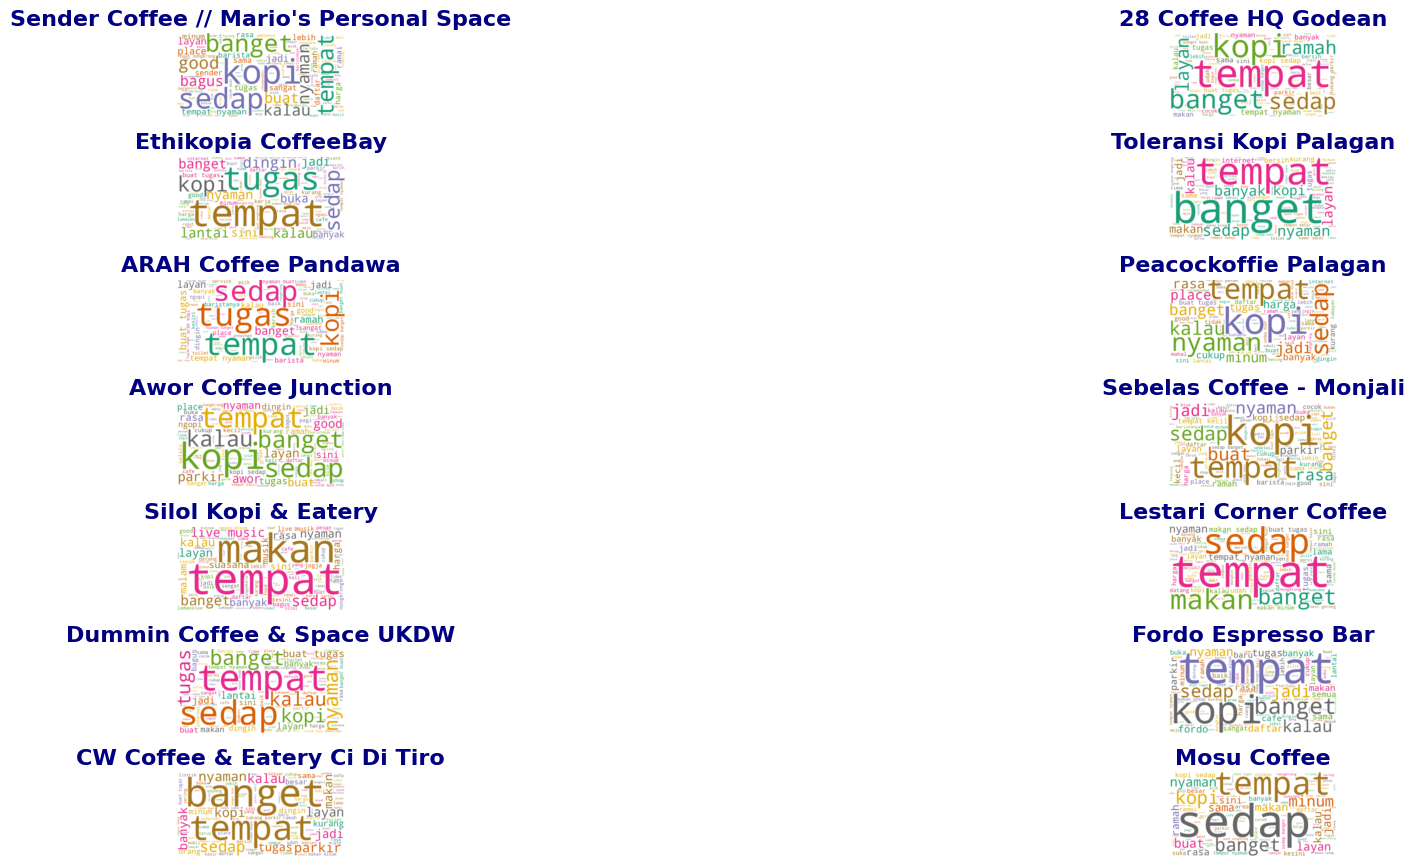

In [58]:
venues = df_datalist['venue_name'].unique()

print(f"Membuat WordCloud untuk: {venues}\n")

# Setting ukuran gambar plot
plt.figure(figsize=(20, 10))

for i, venue in enumerate(venues):
    # 1. Filter data khusus venue tersebut
    subset = df_datalist[df_datalist['venue_name'] == venue]

    # 2. Gabungkan semua review menjadi satu string panjang
    all_text = ' '.join(subset['clean_text'])

    # Cek jika tidak ada teks (misal data kosong setelah cleaning)
    if len(all_text) == 0:
        continue

    # 3. Buat Object WordCloud
    # colormap='RdYlGn' (Merah-Kuning-Hijau) atau 'viridis', 'plasma', 'inferno'
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white', # Ganti 'black' jika ingin gelap
        colormap='Dark2',         # Pilihan warna font
        max_words=100,            # Batasi 100 kata terbanyak saja
        contour_width=3,
        contour_color='steelblue'
    ).generate(all_text)

    # 4. Plotting (Subplot agar tampil berjejer/urutan)
    # Kita buat layout grid otomatis
    plt.subplot(len(venues)//2 + 1, 2, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"{venue}", fontsize=16, color='navy', fontweight='bold')
    plt.axis('off') # Hilangkan sumbu X dan Y

plt.tight_layout()
plt.show()

In [131]:
print("Sedang memuat model IndoBERT...")
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa",
    tokenizer="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
)

def get_hybrid_sentiment(row):
    text = row['clean_text']
    try:
        stars = int(row['reviewer_stars'])
    except:
        stars = 3
    if stars <= 2:
        return "NEGATIF"
    elif stars == 5:
        return "POSITIF"
    else:
        result = sentiment_pipeline(text, truncation=True, max_length=512)[0]
        label = result['label'] # Output: 'positive', 'negative', 'neutral'

    if label == 'positive':
        return "POSITIF"
    elif label == 'negative':
        return "NEGATIF"
    else:
        return "NETRAL"


# --- 3. EKSEKUSI ---
print("Mulai analisis Hybrid...")
tqdm.pandas()
df_datalist['hybrid_sentiment'] = df_datalist.progress_apply(get_hybrid_sentiment, axis=1)

# --- 4. CEK HASIL & SIMPAN ---
print("\n=== Contoh Hasil Hybrid ===")
# Tampilkan teks, bintang, dan hasil sentimennya untuk validasi
print(df_datalist[['reviewer_stars', 'clean_text', 'hybrid_sentiment']].head(10))

# Simpan ke CSV final
df_datalist.to_csv("hasil_sentimen_final_hybrid.csv", index=False)
print("\nSukses! Hasil tersimpan di 'hasil_sentimen_final_hybrid.csv'")

Sedang memuat model IndoBERT...


Device set to use cpu


Mulai analisis Hybrid...


100%|██████████| 3884/3884 [02:00<00:00, 32.33it/s]



=== Contoh Hasil Hybrid ===
   reviewer_stars                                         clean_text  \
0               5                   bagus enjoy buat nongkrong tugas   
1               5  kopi sedap nongkrong recomend banget buat dico...   
2               5                                        sender dulu   
3               5                                             josjis   
4               5  sangat bagus rekomendasi tempat rekomen banget...   
5               5                                               nice   
6               5            layan bagus tempat nyaman coffenya good   
7               5                         nyaman wajib kesini ramahh   
8               5                                             nyaman   
9               5                                              keren   

  hybrid_sentiment  
0          POSITIF  
1          POSITIF  
2          POSITIF  
3          POSITIF  
4          POSITIF  
5          POSITIF  
6          POSITIF  
7         

In [134]:
COL_SENTIMENT = 'hybrid_sentiment'
COL_TEXT = 'clean_text'
color_map = {'POSITIF': '#2ecc71', 'NEGATIF': '#e74c3c', 'NETRAL': '#95a5a6'}

/tmp/ipython-input-3199890411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=COL_SENTIMENT, data=df_datalist, palette=color_map, order=['POSITIF', 'NETRAL', 'NEGATIF'])


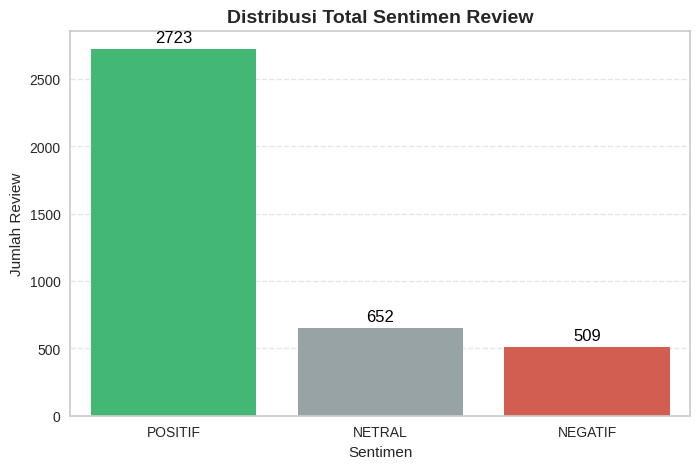

In [135]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=COL_SENTIMENT, data=df_datalist, palette=color_map, order=['POSITIF', 'NETRAL', 'NEGATIF'])

plt.title('Distribusi Total Sentimen Review', fontsize=14, fontweight='bold')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.grid(axis='y', linestyle='--', alpha=0.5)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


--- Generating WordClouds ---


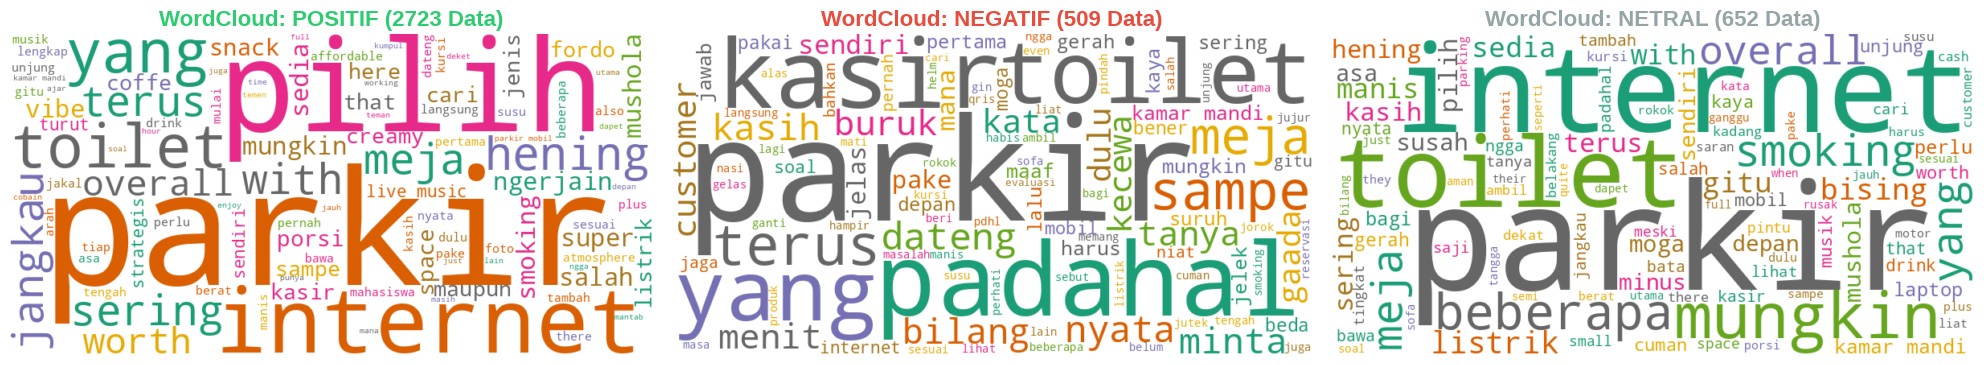

In [136]:
print("\n--- Generating WordClouds ---")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sentiments = ['POSITIF', 'NEGATIF', 'NETRAL']

for i, sent in enumerate(sentiments):
    df_subset = df_datalist[df_datalist[COL_SENTIMENT] == sent]
    text_combined = " ".join(df_subset[COL_TEXT].astype(str))
    if len(text_combined) > 0:
        # Buat WordCloud
        wc = WordCloud(width=800, height=400,
                       background_color='white',
                       stopwords=final_stopwords_v5,
                       colormap='Dark2',
                       max_words=100).generate(text_combined)
        axes[i].imshow(wc, interpolation='bilinear')
        axes[i].set_title(f'WordCloud: {sent} ({len(df_subset)} Data)', fontsize=16, color=color_map[sent], fontweight='bold')
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, "Tidak ada data", ha='center', va='center')
        axes[i].axis('off')

plt.tight_layout()
plt.show()


--- Visualisasi Unigram (Top Keywords) ---


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['the'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['the'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['the'] not in stop_words.
  warnings.warn(


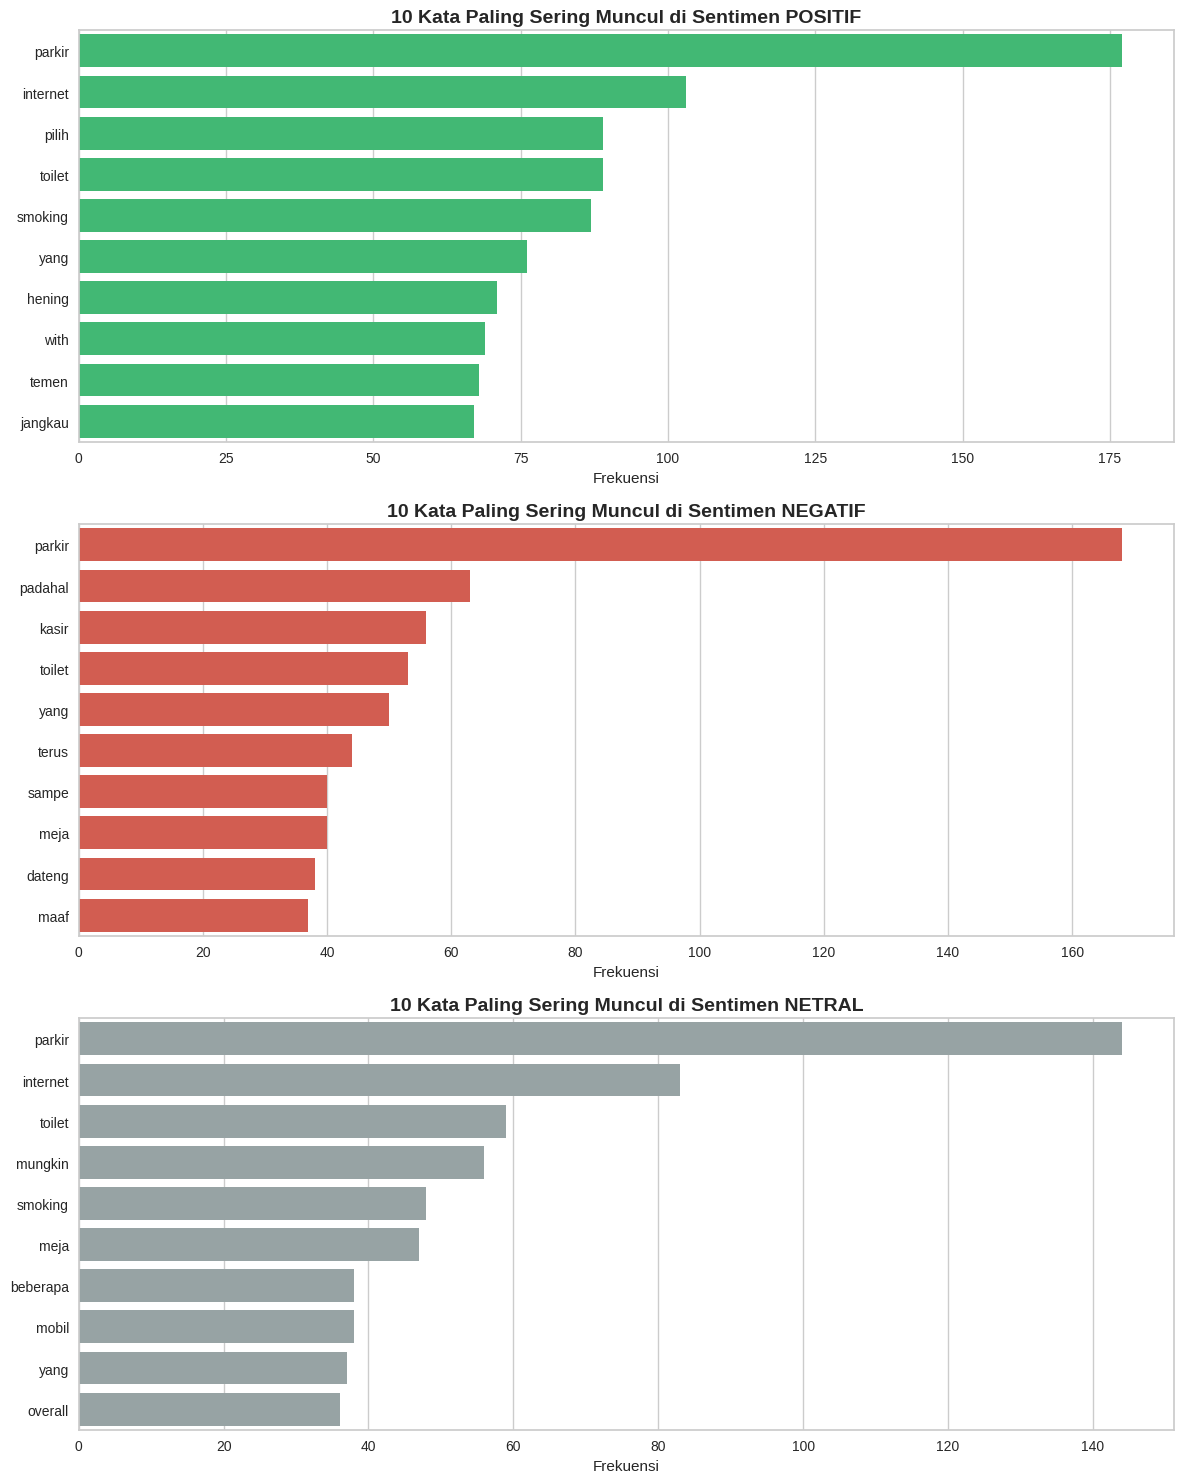

In [137]:
def get_top_unigrams(corpus, top_k=10):
    # ngram_range=(1, 1) artinya hanya ambil 1 kata
    # Pastikan stopwords final Anda (final_stopwords_v5) sudah didefinisikan sebelumnya
    # Jika error 'final_stopwords_v5 not defined', hapus parameter stop_words di bawah
    vec = CountVectorizer(ngram_range=(1, 1), stop_words=final_stopwords_v5).fit(corpus)

    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# --- VISUALISASI ---
print("--- Visualisasi Unigram (Top Keywords) ---")
sentiments = ['POSITIF', 'NEGATIF', 'NETRAL']
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

for i, sent in enumerate(sentiments):
    df_subset = df_datalist[df_datalist[COL_SENTIMENT] == sent]

    if len(df_subset) > 0:
        # Ambil Top 10 Kata
        top_words = get_top_unigrams(df_subset[COL_TEXT], top_k=10)

        if len(top_words) > 0:
            x_words = [x[0] for x in top_words]
            y_freq = [x[1] for x in top_words]

            # Plot
            sns.barplot(x=y_freq, y=x_words, ax=axes[i], color=color_map.get(sent, 'gray'))
            axes[i].set_title(f'10 Kata Paling Sering Muncul di Sentimen {sent}', fontsize=14, fontweight='bold')
            axes[i].set_xlabel('Frekuensi')
        else:
            axes[i].text(0.5, 0.5, "Data terlalu bersih (semua kata terhapus stopword)", ha='center')
    else:
        axes[i].text(0.5, 0.5, "Data Kosong", ha='center')

plt.tight_layout()
plt.show()

In [87]:
my_additional_sw = [
    'kopi', 'coffee', 'shop', 'kafe', 'cafe', 'resto', 'warung',
    'tempat', 'tempatnya', 'lokasi', 'tkp', 'daerah',
    'jogja', 'yogya', 'yogyakarta', 'sleman',
    'review', 'ulasan', 'bintang', 'star',
    'sih', 'nya', 'banget', 'bgt', 'sangat', 'sekali', # Kata penguat emosi kadang bikin bias
    'buat', 'untuk', 'bisa', 'ada', 'jadi', 'dan', 'yg' # Sisa-sisa yg mungkin lolos dari sastrawi
]
more_stopwords = [
    # --- 1. Kata Ganti Orang & Sapaan ---
    'aku', 'saya', 'gw', 'gue', 'kami', 'kita', 'dia', 'mereka', 'anda', 'kamu', 'lu',
    'mas', 'mbak', 'kak', 'kakak', 'pak', 'bu', 'bang', 'gan', 'sis', 'bro', 'min',
    'staff', 'karyawan', 'pegawai', 'pelayan', 'barista', 'orang', 'org',

    # --- 2. Kata Kerja Umum (Konsumsi & Aktivitas) ---
    'makan', 'minum', 'pesan', 'order', 'beli', 'coba', 'nyoba', 'mencoba',
    'datang', 'berkunjung', 'mampir', 'kesini', 'kesana', 'pulang', 'masuk', 'keluar',
    'nongkrong', 'duduk', 'ngopi', 'ngobrol', 'bicara', 'ketemu', 'tunggu', 'nunggu',

    # --- 3. Kata Keterangan Waktu (Kecuali '24 jam' karena itu fitur) ---
    'hari', 'jam', 'pukul', 'tanggal', 'bulan', 'tahun',
    'pagi', 'siang', 'sore', 'malam', 'malem', 'bengi',
    'kemarin', 'besok', 'lusa', 'tadi', 'barusan', 'sekarang', 'saat', 'pas', 'waktu',
    'buka', 'tutup', 'open', 'close', 'lama', 'baru', 'awal', 'akhir',

    # --- 4. Kata Tunjuk & Preposisi Sisa ---
    'ini', 'itu', 'sini', 'situ', 'sana',
    'dari', 'ke', 'di', 'pada', 'adalah', 'ialah', 'yaitu',
    'dan', 'atau', 'tetapi', 'tapi', 'melainkan', 'sedangkan',
    'kalau', 'kalo', 'jika', 'bila', 'apabila', 'karena', 'karna', 'sebab', 'biar', 'supaya',

    # --- 5. Kata Penguat & Filler (Basa-basi) ---
    'banget', 'bgt', 'sekali', 'sangat', 'terlalu', 'lumayan', 'cukup', 'agak', 'sedikit', 'banyak',
    'sih', 'dong', 'deh', 'kok', 'mah', 'kan', 'yuk', 'ya', 'yah', 'ygy',
    'wkwk', 'haha', 'hehe', 'hihi', 'huhu', 'si', 'ni', 'tu',
    'oke', 'ok', 'okay', 'sip', 'mantap', 'good', 'nice', 'best', 'jos', # Sentimen umum (bukan topik)
    'biasa', 'standar', 'aja', 'saja', 'doang', 'cuma', 'hanya',

    # --- 6. Kata Benda Umum (Non-Topik) ---
    'review', 'ulasan', 'komentar', 'rating', 'bintang', 'star', 'nilai',
    'tempat', 'lokasi', 'posisi', 'daerah', 'area', 'zone', 'spot', 'ruang',
    'lantai', 'atas', 'bawah', 'dalam', 'luar', 'indoor', 'outdoor', # Kadang perlu dihapus jika mendominasi
    'jogja', 'yogya', 'yogyakarta', 'sleman', 'bantul', 'indonesia',
    'kopi', 'coffee', 'kafe', 'cafe', 'coffeeshop', 'shop', 'warung', 'resto',
    'menu', 'daftar', 'list', 'harga', 'price', 'biaya', 'uang', 'bayar' # 'Mahal'/'Murah' disimpan, tapi 'Harga' dibuang
]

# Gabungkan dengan list lama Anda
final_stopwords = my_additional_sw + more_stopwords

# Gunakan set() untuk menghapus duplikat agar proses lebih cepatfinal_stopwords = list(set(final_stopwords))

In [100]:

stopword_spam_sentimen = [
    # Kata Sifat Umum (Tidak spesifik)
    'sedap', 'enak', 'uenak', 'mantap', 'lezat', 'nikmat', # Rasa umum
    'bagus', 'keren', 'kece', 'jos', 'top', 'best', 'good', # Pujian umum
    'asik', 'asyik', 'seru', 'cocok', 'pas', 'recomended', 'rekomen', # Rekomendasi
    'nyaman', 'betah', 'pewe', 'cozy', 'comfort', # "Nyaman" itu akibat, bukan fitur. Fiturnya: "Sofa", "AC"
    'ramah', 'baik', 'sopan', 'humble', # Pelayanan (biarkan 'barista' atau 'staff' yang muncul)
    'layan', 'pelayanan', 'service', # Kata benda abstrak
    'suka', 'love', 'favorite', 'favorit',
    'mahal', 'murah', 'pricey', 'terjangkau','tidak' # Harga (biarkan user lihat $$ di maps)

    # Kata Kerja/Benda Umum yang lolos
    'place', 'tempat', 'lokasi', 'suasana', 'situasi',
    'semua', 'sama', 'banyak', 'lebih', 'kurang',
    'datang', 'kunjung', 'mampir', 'balik',
    'tugas', 'nugas', 'kerja', 'skripsi', # JIKA ini mendominasi semua cluster, hapus saja biar fitur lain muncul
]

# Gabungkan dengan list sebelumnya
final_stopwords_v2 = final_stopwords + stopword_spam_sentimen
final_stopwords_v2 = list(set(final_stopwords_v2)) # Hapus duplikat

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000,
                             min_df=2,
                             max_df=0.9,
                             stop_words=final_stopwords_v2) # <--- INI KUNCINYA

# Fit ke data yang SUDAH Anda bersihkan sebelumnya (clean_text)
# Jadi ini adalah pembersihan tahap 2 (Final Polishing)
X_sparse = vectorizer.fit_transform(df_datalist['clean_text'])

Menghitung ulang skor K-Means...


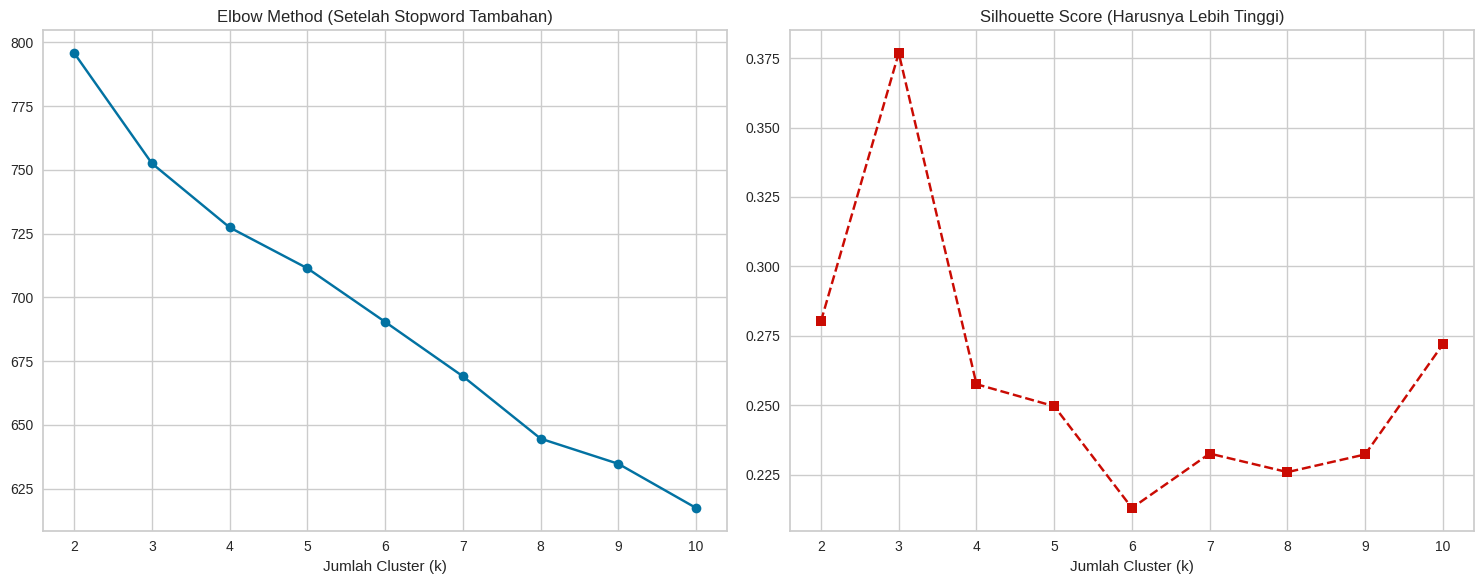

In [102]:
X_sparse = vectorizer.fit_transform(df_datalist['clean_text'])

# --- 3. LANJUT KE REDUKSI DIMENSI & VISUALISASI (Sama seperti sebelumnya) ---
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X_sparse)

# Hitung ulang Elbow/Silhouette
inertia = []
silhouette_scores = []
K_range = range(2, 11)

print("Menghitung ulang skor K-Means...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reduced)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_reduced, kmeans.labels_))

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow
ax1.plot(K_range, inertia, 'bo-')
ax1.set_title('Elbow Method (Setelah Stopword Tambahan)')
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'rs--')
ax2.set_title('Silhouette Score (Harusnya Lebih Tinggi)')
ax2.set_xlabel('Jumlah Cluster (k)')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [119]:

vocab_nugas = [
    'wifi', 'wi-fi', 'internet', 'sinyal', 'koneksi', 'jaringan', 'lemot', 'lelet', 'lancar', 'kencang', 'stabil',
    'colokan', 'listrik', 'steker', 'stopkontak', 'cas', 'charge', 'charger', 'baterai',
    'nugas', 'tugas', 'skripsi', 'skripsian', 'kerja', 'work', 'wfc', 'meeting', 'rapat', 'zoom', 'online',
    'laptop', 'hening', 'tenang', 'sepi', 'fokus', 'kondusif', 'ac', 'dingin', 'indoor', 'meja', 'kursi'
]

vocab_nongkrong = [
    'luas', 'besar', 'lega', 'sempit', 'padat', 'lantai', 'tingkat', 'balkon', 'teras', 'rooftop', 'outdoor',
    'rombongan', 'rame', 'ramai', 'penuh', 'waiting', 'antri', 'parkir', 'parkiran', 'mobil', 'motor', 'akses',
    'nongkrong', 'nongki', 'ngobrol', 'cerita', 'curhat', 'kumpul', 'temu', 'teman', 'pacar',
    'suasana', 'view', 'pemandangan', 'estetik', 'instagramable', 'foto', 'spot', 'musik', 'live',
    'toilet', 'wc', 'mushola', 'sholat', 'bersih', 'kotor', 'smoking', 'rokok', 'merokok', 'asbak', 'bising'
]

vocab_rasa = [
    'kopisusu', 'kopsus', 'latte', 'cappuccino', 'americano', 'espresso', 'mocha', 'manual', 'brew', 'v60',
    'arabica', 'robusta', 'beans', 'coklat', 'matcha', 'redvelvet', 'taro', 'teh', 'lychee', 'lemon',
    'pahit', 'asam', 'asem', 'acid', 'manis', 'creamy', 'strong', 'light', 'watery', 'hambar',
    'enak', 'sedap', 'nikmat', 'segar', 'hangat', 'es', 'ice', 'hot',
    'makan', 'makanan', 'nasi', 'goreng', 'mie', 'ayam', 'rice', 'bowl', 'pasta', 'snack', 'camilan',
    'kentang', 'fries', 'roti', 'toast', 'pisang', 'singkong',
    'menu', 'daftar', 'varian', 'harga', 'price', 'murah', 'mahal', 'porsi', 'kenyang'
]

In [120]:
# --- 2. FUNGSI SCORING (LOGIKA PEMENANG) ---
def klasifikasi_topik(text):
    text = text.lower()

    # Hitung berapa kali kata kunci muncul di teks review
    score_nugas = sum(1 for word in vocab_nugas if word in text)
    score_nongkrong = sum(1 for word in vocab_nongkrong if word in text)
    score_rasa = sum(1 for word in vocab_rasa if word in text)

    # Cari skor tertinggi
    if score_nugas == 0 and score_nongkrong == 0 and score_rasa == 0:
        return "Umum/Lainnya" # Tidak ada kata kunci yang cocok

    if score_nugas >= score_nongkrong and score_nugas >= score_rasa:
        return "Produktivitas (Nugas)"
    elif score_nongkrong > score_nugas and score_nongkrong >= score_rasa:
        return "Sosial (Nongkrong)"
    else:
        return "Produk (F&B)"

In [121]:
df_datalist['kategori_final'] = df_datalist['clean_text'].apply(klasifikasi_topik)

In [122]:
print("\n=== CONTOH HASIL KLASIFIKASI ===")
print(df_datalist[['clean_text', 'kategori_final']].head(10))


=== CONTOH HASIL KLASIFIKASI ===
                                          clean_text         kategori_final
0                   bagus enjoy buat nongkrong tugas  Produktivitas (Nugas)
1  kopi sedap nongkrong recomend banget buat dico...           Produk (F&B)
2                                        sender dulu           Umum/Lainnya
3                                             josjis           Umum/Lainnya
4  sangat bagus rekomendasi tempat rekomen banget...     Sosial (Nongkrong)
5                                               nice           Produk (F&B)
6            layan bagus tempat nyaman coffenya good           Umum/Lainnya
7                         nyaman wajib kesini ramahh           Produk (F&B)
8                                             nyaman           Umum/Lainnya
9                                              keren           Umum/Lainnya


In [123]:
df_filtered = df_datalist[df_datalist['kategori_final'] != "Umum/Lainnya"]


=== PERBANDINGAN DOMINASI TOPIK (%) ===


In [125]:
print("\n=== VALIDASI ISI KATEGORI ===")
for kat in ["Produktivitas (Nugas)", "Sosial (Nongkrong)", "Produk (F&B)"]:
    print(f"\n--- {kat} ---")
    sample = df_datalist[df_datalist['kategori_final'] == kat]['clean_text'].head(3).tolist()
    for s in sample:
        print(f"- {s}")


=== VALIDASI ISI KATEGORI ===

--- Produktivitas (Nugas) ---
- bagus enjoy buat nongkrong tugas
- space kecil nyaman excellent service
- layan sedap kopi juara jauh jauh cilacap sini langsung rasa sedap

--- Sosial (Nongkrong) ---
- sangat bagus rekomendasi tempat rekomen banget nich buat nongkrong
- caffe much good buat kalian nongki kalcer
- tempat asik buat nongki

--- Produk (F&B) ---
- kopi sedap nongkrong recomend banget buat dicobain gass kesini
- nice
- nyaman wajib kesini ramahh


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. PERSIAPAN DATA ---
# Kita butuh data: Nama Venue, Kategori, dan Sentimen
# Filter dulu kategori 'Umum/Lainnya' agar tidak mengganggu
df_final = df_datalist[df_datalist['kategori_final'] != "Umum/Lainnya"].copy()

# --- 2. HITUNG SKOR KEPUASAN ---
# Grouping berdasarkan Venue dan Kategori
summary = df_final.groupby(['venue_name', 'kategori_final', 'hybrid_sentiment']).size().unstack(fill_value=0)

# Tambahkan kolom Total dan Persentase
summary['Total_Review'] = summary['NEGATIF'] + summary['NETRAL'] + summary['POSITIF']
summary['Score_Kepuasan'] = (summary['POSITIF'] / summary['Total_Review']) * 100

# Reset index agar jadi DataFrame biasa
summary = summary.reset_index()

# --- 3. FUNGSI MENCARI JUARA ---
def cari_juara(kategori, min_review=10):
    print(f"\n🏆 --- TOP 5: {kategori} --- 🏆")

    # Filter kategori spesifik
    df_kat = summary[summary['kategori_final'] == kategori]

    # Filter minimal review (agar data valid, tidak cuma 1 review tapi 100% positif)
    df_kat = df_kat[df_kat['Total_Review'] >= min_review]

    # Urutkan berdasarkan Score Kepuasan tertinggi, lalu Total Review terbanyak
    juara = df_kat.sort_values(by=['Score_Kepuasan', 'Total_Review'], ascending=[False, False]).head(5)

    # Tampilkan hasil rapi
    print(juara[['venue_name', 'Total_Review', 'Score_Kepuasan']].to_string(index=False))

    # Kembalikan data untuk visualisasi
    return juara

# --- 4. CETAK HASIL ---
# Minimal 10 review agar tidak bias (bisa diubah sesuai jumlah data Anda)
top_nugas = cari_juara("Produktivitas (Nugas)", min_review=5)
top_nongkrong = cari_juara("Sosial (Nongkrong)", min_review=5)
top_rasa = cari_juara("Produk (F&B)", min_review=5)


🏆 --- TOP 5: Produktivitas (Nugas) --- 🏆
                             venue_name  Total_Review  Score_Kepuasan
                    28 Coffee HQ Godean            71       80.281690
                            Mosu Coffee            46       78.260870
                    Ethikopia CoffeeBay           107       77.570093
Sender Coffee // Mario's Personal Space            46       76.086957
                    ARAH Coffee Pandawa           106       75.471698

🏆 --- TOP 5: Sosial (Nongkrong) --- 🏆
                             venue_name  Total_Review  Score_Kepuasan
Sender Coffee // Mario's Personal Space            32       78.125000
                     Fordo Espresso Bar            52       76.923077
                    Ethikopia CoffeeBay            53       75.471698
                            Mosu Coffee            52       71.153846
                    Silol Kopi & Eatery           105       67.619048

🏆 --- TOP 5: Produk (F&B) --- 🏆
                             venue_name  Total